# Introduction

In [51]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from platform import python_version

print(python_version())
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

3.11.9
2.0.2
2.2.2
1.6.1


📝 All the package versions are the same as those of Google Colab!

# EDA - Exploratory Data Analysis

## Raw Data Overview & Data Splitting

### Overview

In [52]:
data_raw = pd.read_csv(".\\topic21_v9_train.csv")
data_raw

,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type,price
0,NaN,3.764959,3.686498,0.504080,2.816529,Mercedes-Benz,M-Class,ML 500,SUV,Petrol,Automatic Transmission,NaN,500 - 599 HP,White,Beige,Does not apply,Dubai,Owner,79000
1,0.500825,3.509076,14.804767,0.244597,-0.876152,Tesla,Model 3,Performance,Sedan,Electric,Automatic Transmission,500 - 999 cc,600 - 699 HP,Black,White,Yes,Dubai,Owner,168000
2,1.915838,3.711548,7.975758,0.651522,3.378688,Audi,Q7,S-line,SUV,Petrol,Automatic Transmission,3000 - 3499 cc,200 - 299 HP,Blue,Beige,Does not apply,Dubai,Owner,52500
3,0.279719,3.842128,5.903154,0.313971,2.489437,Bentley,Continental GT,Other,Soft Top Convertible,Petrol,Automatic Transmission,4000+ cc,600 - 699 HP,Orange,Black,Yes,Dubai,Dealer,1160
4,0.689781,3.613425,8.651282,0.273852,1.337020,Peugeot,508,Active,Sedan,Petrol,Automatic Transmission,1500 - 1999 cc,100 - 199 HP,Red,Beige,Yes,Dubai,Dealer,78900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,2.905641,NaN,23.191578,0.476294,0.206035,Land Rover,Range Rover Sport,HSE,SUV,Petrol,Automatic Transmission,3000 - 3499 cc,300 - 399 HP,Grey,Beige,No,Dubai,Dealer,90900
7958,0.434064,3.603330,11.182552,0.413911,0.114275,Renault,Talisman,SE,Sedan,Petrol,Automatic Transmission,2000 - 2499 cc,100 - 199 HP,Blue,Black,No,Dubai,Dealer,43900
7959,0.804830,3.575916,25.227375,0.345557,0.457583,Mercedes-Benz,GLE-Class,GLE 350,SUV,Petrol,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,Black,Brown,Yes,Sharjah,Dealer,200000
7960,0.352151,3.602651,-0.568026,0.254414,-0.054873,Mercedes-Benz,SL-Class,Other,Soft Top Convertible,Petrol,Automatic Transmission,4000+ cc,300 - 399 HP,Grey,Unknown,Yes,Dubai,Owner,590000


In [53]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7962 entries, 0 to 7961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   7262 non-null   float64
 1   1                   7518 non-null   float64
 2   2                   7147 non-null   float64
 3   3                   7484 non-null   float64
 4   4                   7495 non-null   float64
 5   brand               7962 non-null   object 
 6   model               7962 non-null   object 
 7   trim                7951 non-null   object 
 8   body_type           7962 non-null   object 
 9   fuel_type           7962 non-null   object 
 10  transmission_type   7962 non-null   object 
 11  engine_capacity_cc  6362 non-null   object 
 12  horsepower          7584 non-null   object 
 13  exterior_color      7962 non-null   object 
 14  interior_color      7962 non-null   object 
 15  warranty            7962 non-null   object 
 16  city  

**Data Breakdown:** 

This is a regression problem. We have 5 numerical features and 13 "categorical" * features. 

*After deeper we will see that some of these categorical features are actually numerical categories and there will be plenty of fun Feature Engineering to deal with this!

This allows us to proceed with the "standard" splitting of our dataset. i.e. a 80/20 split, without stratify, considering this will be a regression problem.

### Data Importing & Splitting

Below is a splitter function. Originally this was written in a separate file for all team members to be able to export the same split of dataset for all three team members. In this case however, we've pasted it in this notebook as is.


In [54]:
import pandas as pd

def splitter(path: str):

    """
    Loads data from a CSV file and splits it into training and testing sets.

    Parameters:
    -----------
    path : str
        Path to the CSV file.

    Returns:
    --------
    X_train, X_test, y_train, y_test : pd.DataFrame, pd.DataFrame, pd.Series, pd.Series
        Split training and testing features and target.
    """

    df = pd.read_csv(path)

    if 'price' not in df.columns:
        raise ValueError(f"Target column 'price' not found in dataset.")

    X = df.drop(columns=['price'])
    y = df['price']

    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")

# Post-Split Data Overview

### Code Part

In [61]:
print(X_train.dtypes)

# Deep look into categorical data
train_categ = X_train.select_dtypes(include='object').reset_index(drop=True)
print(train_categ)

0                     float64
1                     float64
2                     float64
3                     float64
4                     float64
brand                  object
model                  object
trim                   object
body_type              object
fuel_type              object
transmission_type      object
engine_capacity_cc     object
horsepower             object
exterior_color         object
interior_color         object
warranty               object
city                   object
seller_type            object
dtype: object
              brand        model           trim  body_type fuel_type  \
0               GMC       Acadia         Denali  Crossover    Petrol   
1            Nissan        Tiida        SL Plus  Hatchback    Petrol   
2            Subaru          WRX        WRX STI      Sedan    Petrol   
3     Mercedes-Benz      C-Class  C200 Elegance      Sedan    Petrol   
4            Suzuki        Jimny         GLX MT        SUV    Petrol   
...           

In [56]:
print(train_categ['horsepower'].isna().sum() + (train_categ['horsepower'] == 'Unknown').sum())
print(train_categ['horsepower'].value_counts())

713
horsepower
200 - 299 HP    1557
300 - 399 HP    1156
100 - 199 HP    1110
400 - 499 HP     717
500 - 599 HP     580
Unknown          413
600 - 699 HP     308
700 - 799 HP     100
0 - 99 HP         54
800 - 899 HP      37
900+ HP           37
Name: count, dtype: int64


We see that some of the values in horsepower (and potentially in other features as well) are incorrently labeled as "Unknown" and thus are being intepreted as a filled value of Dtype String. Thus this needs to be fixed (done below) 

In [57]:
# set 'Unknown' to NaN in each column of X_train
X_train = X_train.replace('Unknown', np.nan)


Continuing with exploration

In [65]:
# Check for missing values in categorical columns
for col in train_categ.columns:
    print(f"{col} has {train_categ[col].isna().sum()} missing values")

# Unique values in horsepower
print("\nThe number of unique values in horsepower column:")
print(train_categ['horsepower'].value_counts())

# Unique values in ext color
print("\nThe number of unique values in exterior color column:")
print(train_categ['exterior_color'].value_counts())

# Unique values in int color
print("\nThe number of unique values in interior color column:")
print(train_categ['interior_color'].value_counts())

brand has 0 missing values
model has 0 missing values
trim has 8 missing values
body_type has 0 missing values
fuel_type has 0 missing values
transmission_type has 0 missing values
engine_capacity_cc has 1704 missing values
horsepower has 713 missing values
exterior_color has 0 missing values
interior_color has 1280 missing values
warranty has 0 missing values
city has 0 missing values
seller_type has 0 missing values

The number of unique values in horsepower column:
horsepower
200 - 299 HP    1557
300 - 399 HP    1156
100 - 199 HP    1110
400 - 499 HP     717
500 - 599 HP     580
600 - 699 HP     308
700 - 799 HP     100
0 - 99 HP         54
800 - 899 HP      37
900+ HP           37
Name: count, dtype: int64

The number of unique values in exterior color column:
exterior_color
White          2002
Black          1412
Grey            925
Blue            523
Silver          501
Red             355
Brown           141
Gold            110
Green            99
Yellow           60
Beige     

📝 We see the immediate problem of missing values: engine_capcity_cc, interior_color, horsepower, & trim all have missing values. This will need be dealt with in feature engineering by some kind of imputing.

📝 We also see that for colors, there is a dispropotional distribution i.e. There are a few colors that have more than 80% (ballpark, dont quote us on this) of the cars and the rest 20% are "niche" colors.
    
    i.e. For instance, in exterior color, the data shows that white, black, grey etc. are by far the most common exterior car colors, while colors like purple, tan, etc. are rare, indicating a strong preference for neutral tones in the dataset.
    
    This gives us some possible ideas for feature eng: we can consider concatinating all the "niche" color under one category possibly "others"

## Initial Visualizations & Analysis

Text(0.5, 1.0, 'Distribution of Target Variable (Price)')

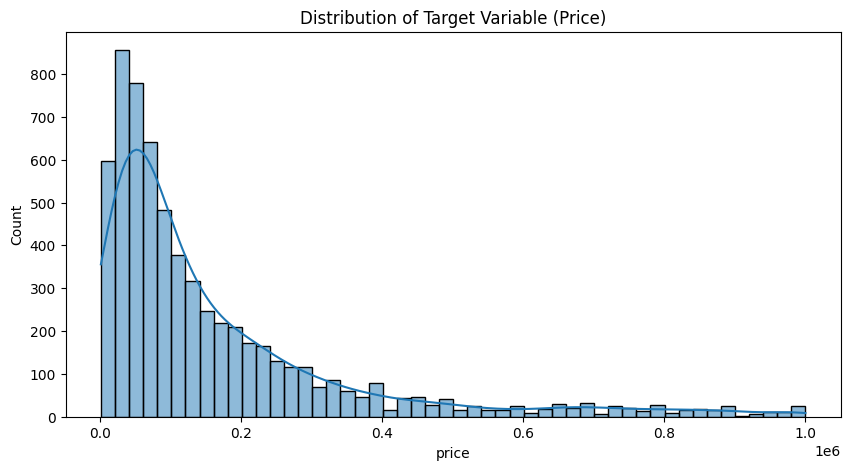

In [76]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot((y_train), bins=50, kde=True)
plt.title('Distribution of Target Variable (Price)')

📝⚠️ The distribution of price is heavily right-skewed, perhaps it makes sense to log it in further visualizations

We intend to compute correlation later, hence we should normalize the target column before computing the correlation. 

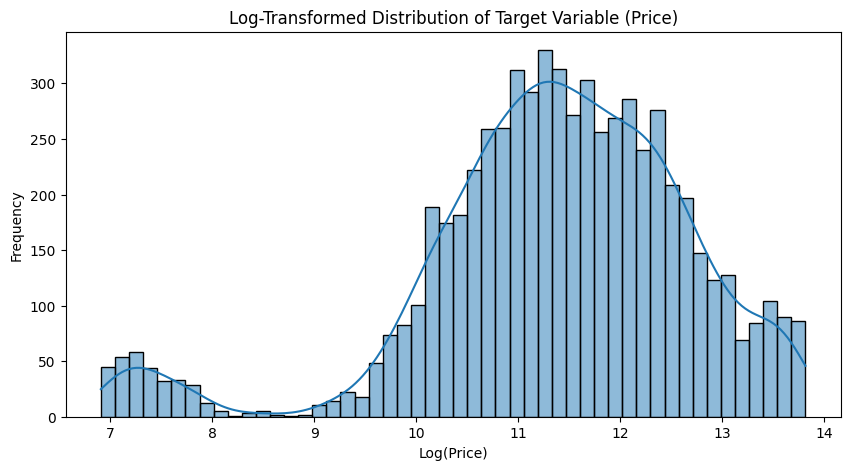

In [78]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(y_train), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Target Variable (Price)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

### Categorical vs Price 

#### Mean price for each category

In [68]:
# add the price column to X_train
train = X_train.select_dtypes(include='object').join(y_train)

# select the columns with less than 5 categories
mono_categ = X_train.columns[X_train.nunique() < 20]

# save unique values for each column in a dictionary
cat_dict = {}
for cat in mono_categ:
    cat_dict[cat] = pd.DataFrame(train[cat].unique())
    cat_dict[cat].columns = [cat]

    # add the column with the mean price for each category
    cat_dict[cat]['mean_price'] = train.groupby(cat)['price'].mean().reset_index(drop=True)

cat_dict

{'body_type':                body_type     mean_price
 0              Crossover  252899.584906
 1              Hatchback   71529.942308
 2                  Sedan  170938.808989
 3                    SUV   75215.718213
 4             Sports Car  174867.450000
 5                  Coupe  160998.614379
 6                    Van  175146.353466
 7          Pick Up Truck  121935.763098
 8   Hard Top Convertible  296832.228571
 9   Soft Top Convertible  195054.452555
 10                 Other  230428.571429
 11         Utility Truck  189640.816901
 12                 Wagon  137350.967742,
 'fuel_type':   fuel_type     mean_price
 0    Petrol  177314.274725
 1    Hybrid  281533.360825
 2    Diesel  205007.351064
 3  Electric  162051.431247,
 'transmission_type':         transmission_type     mean_price
 0  Automatic Transmission  164785.273285
 1     Manual Transmission  162513.333333,
 'engine_capacity_cc':   engine_capacity_cc     mean_price
 0     3000 - 3499 cc  106757.206897
 1            

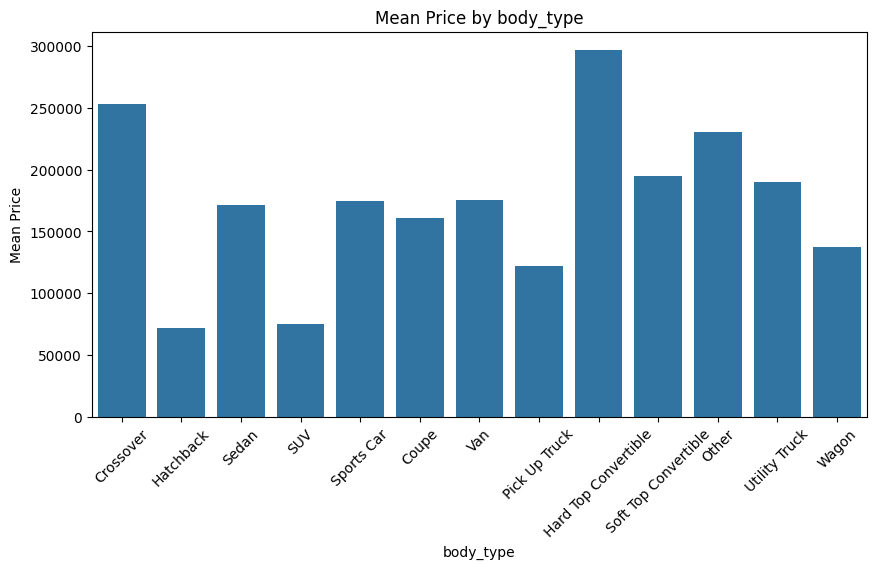

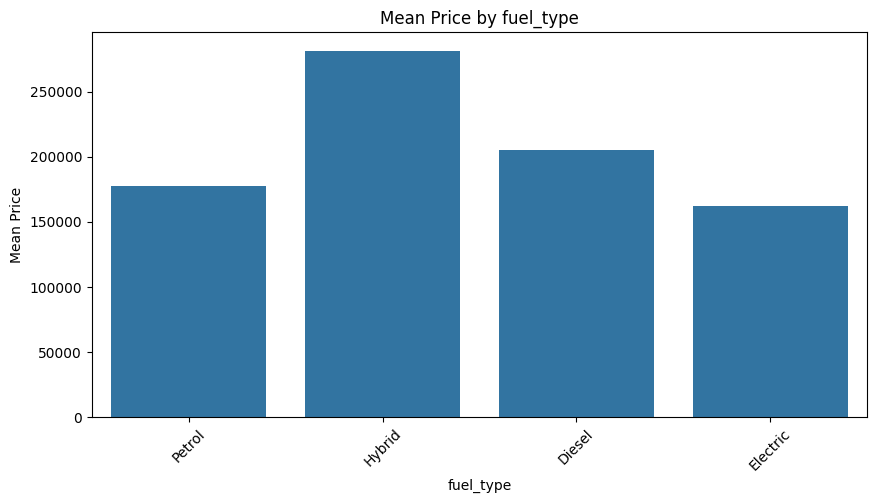

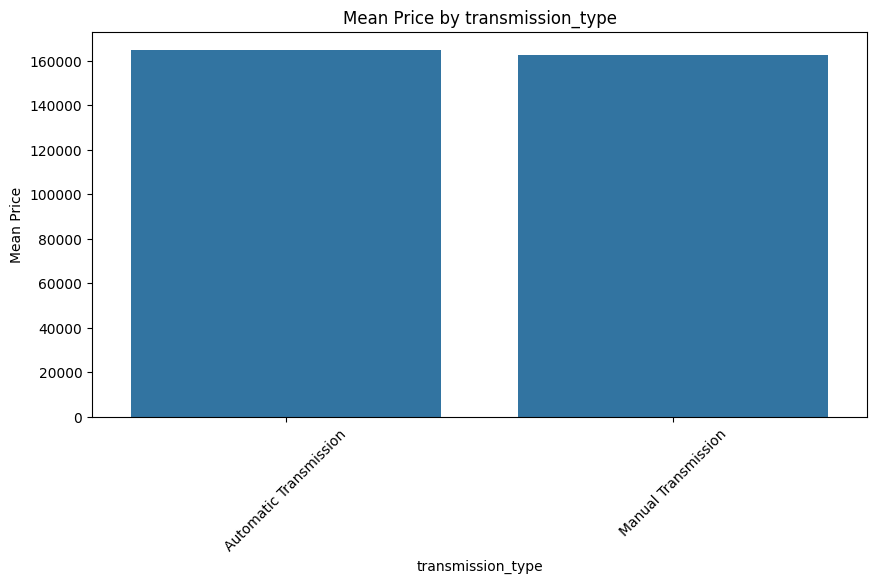

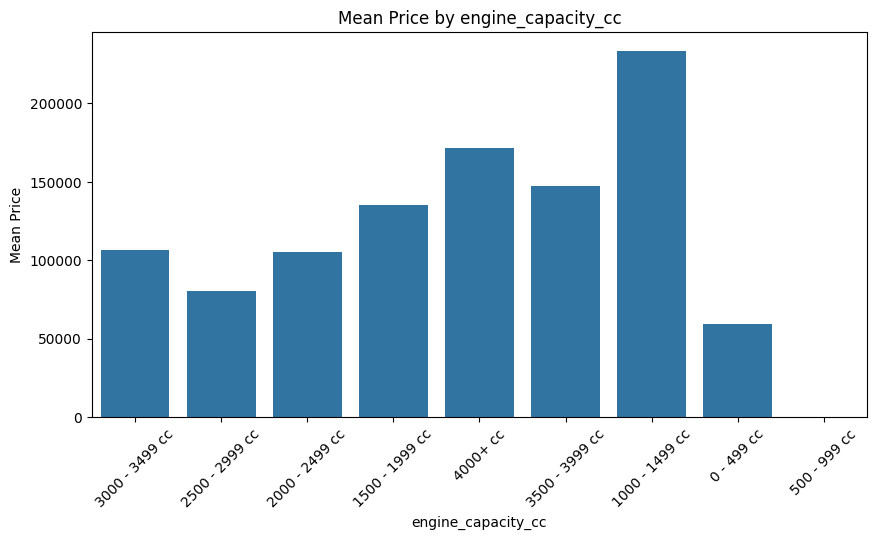

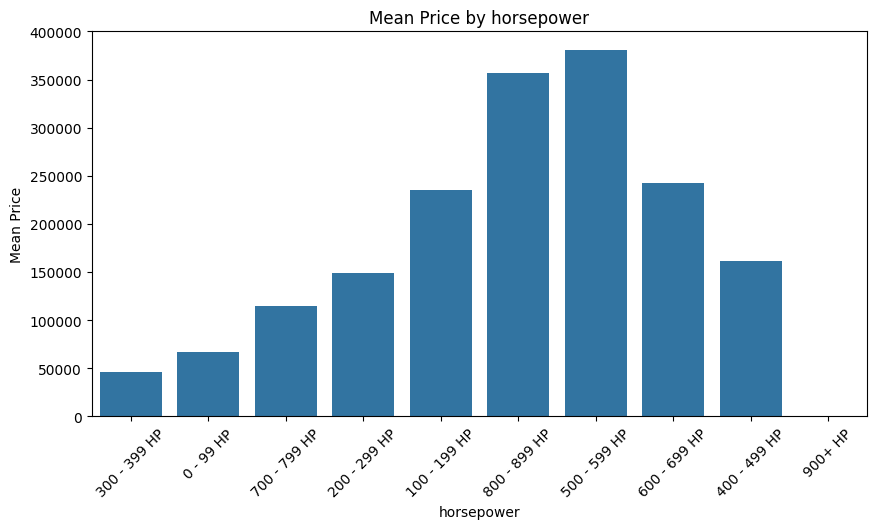

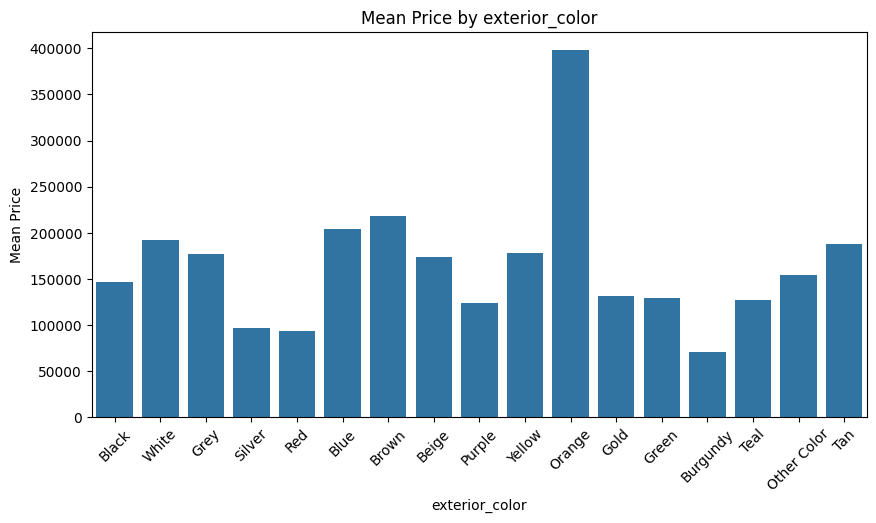

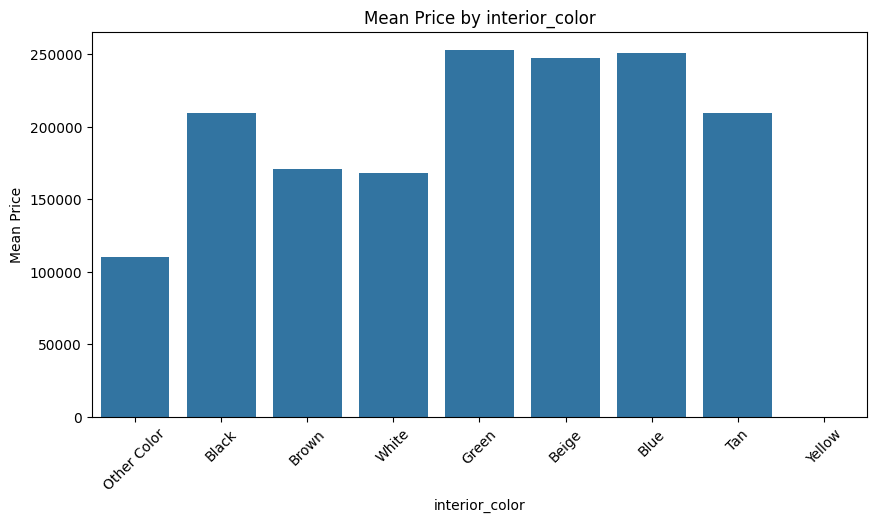

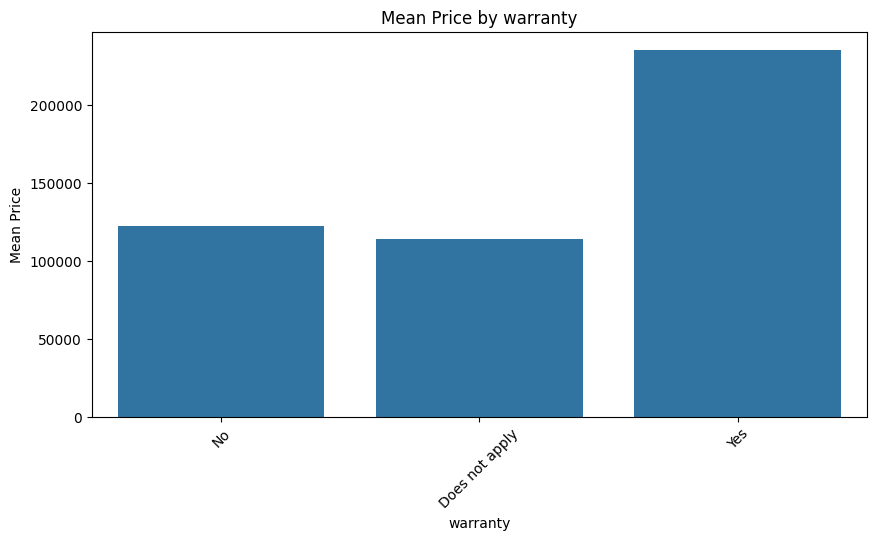

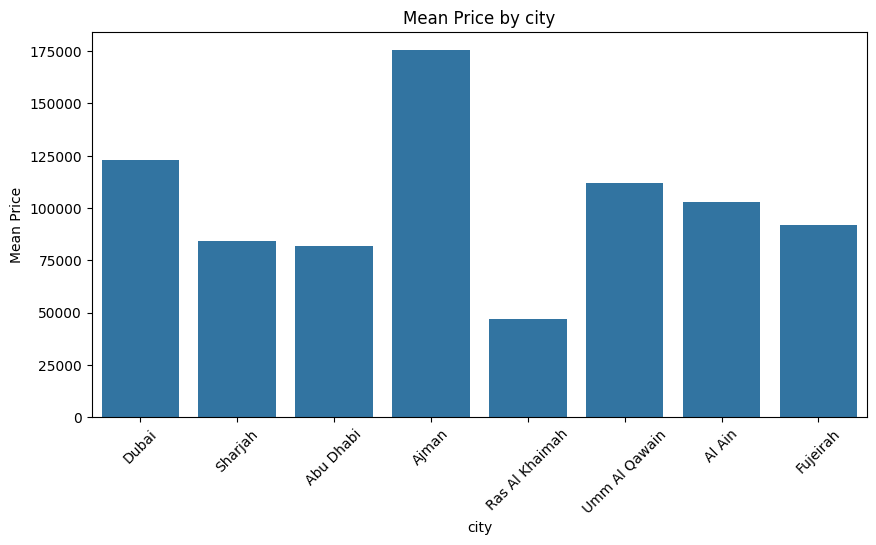

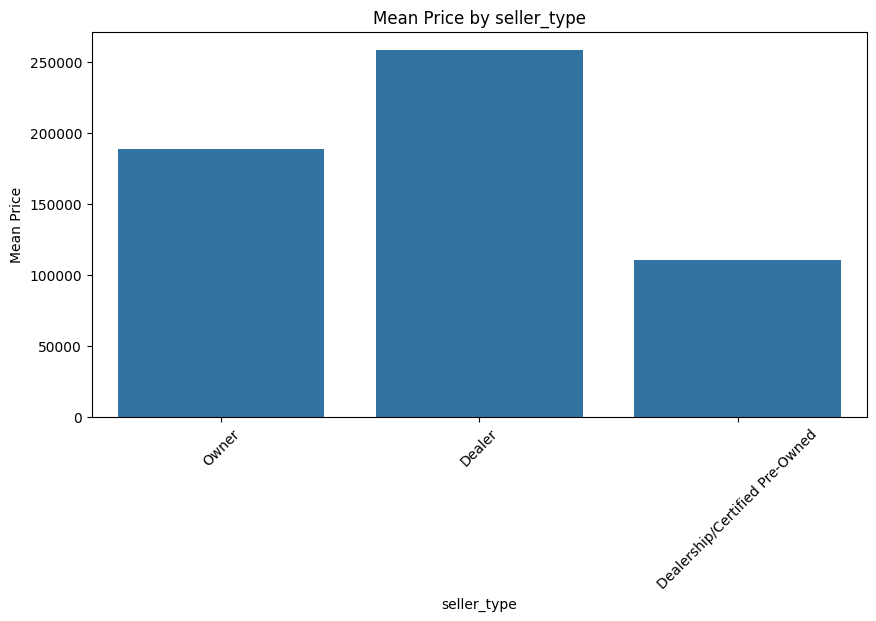

In [69]:
# compute mean prices for ecah category of the selected columns

for cat, df in cat_dict.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[cat], y=df['mean_price'])
    plt.title(f'Mean Price by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.show()

### Other categories vs Price

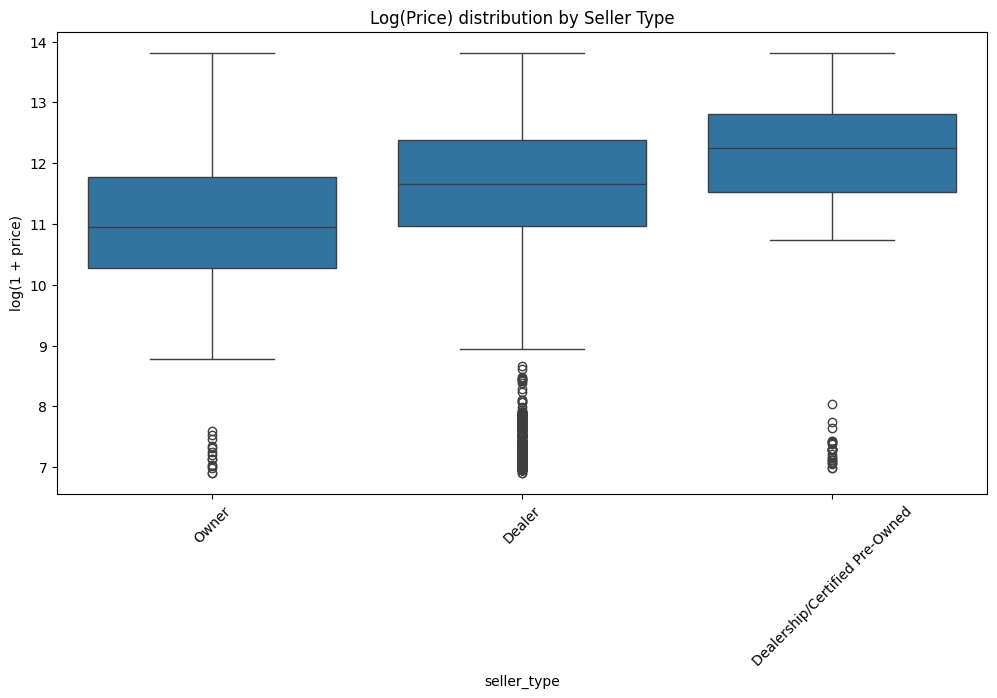

In [90]:
# Seller type. 
# we take Log(Price) to make the visualization more readable
plt.figure(figsize=(12,6))
sns.boxplot(x='seller_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Seller Type')
plt.ylabel('log(1 + price)')
plt.show()

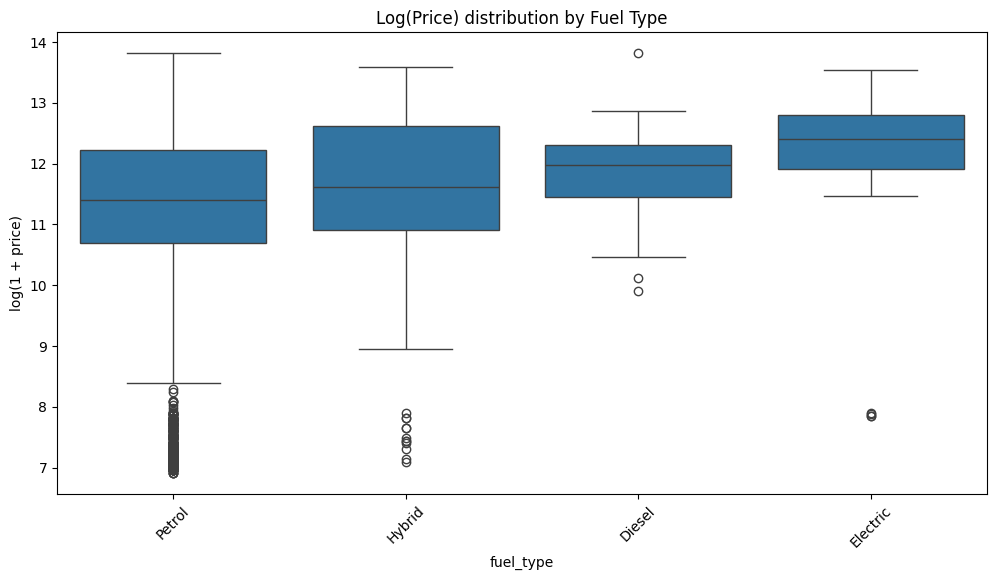

In [91]:
# Fuel Type
plt.figure(figsize=(12,6))
sns.boxplot(x='fuel_type', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Fuel Type')
plt.ylabel('log(1 + price)')
plt.show()

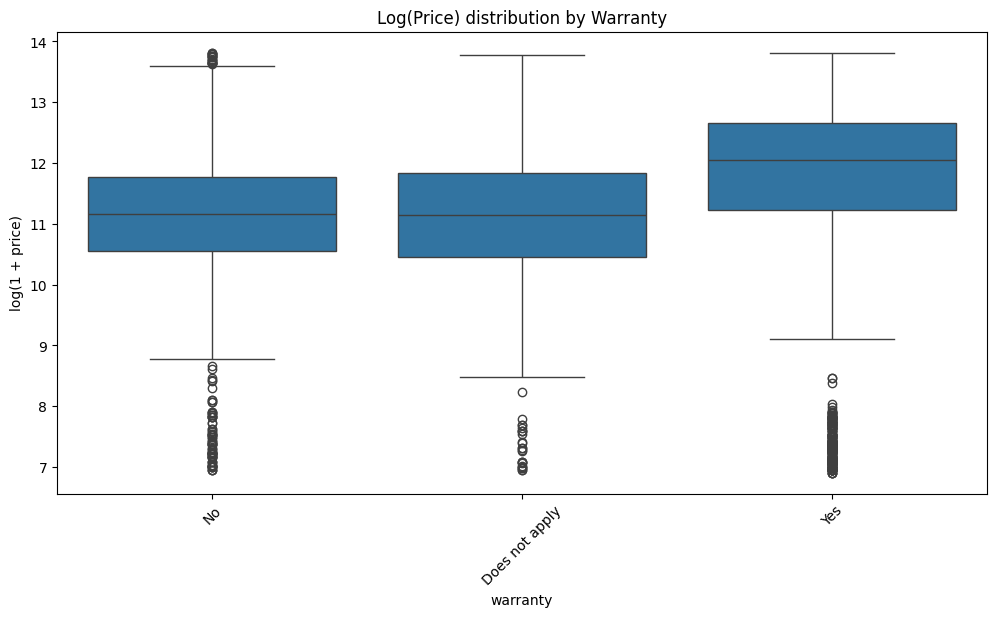

In [92]:
# Warranty

plt.figure(figsize=(12,6))
sns.boxplot(x='warranty', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by Warranty')
plt.ylabel('log(1 + price)')
plt.show()


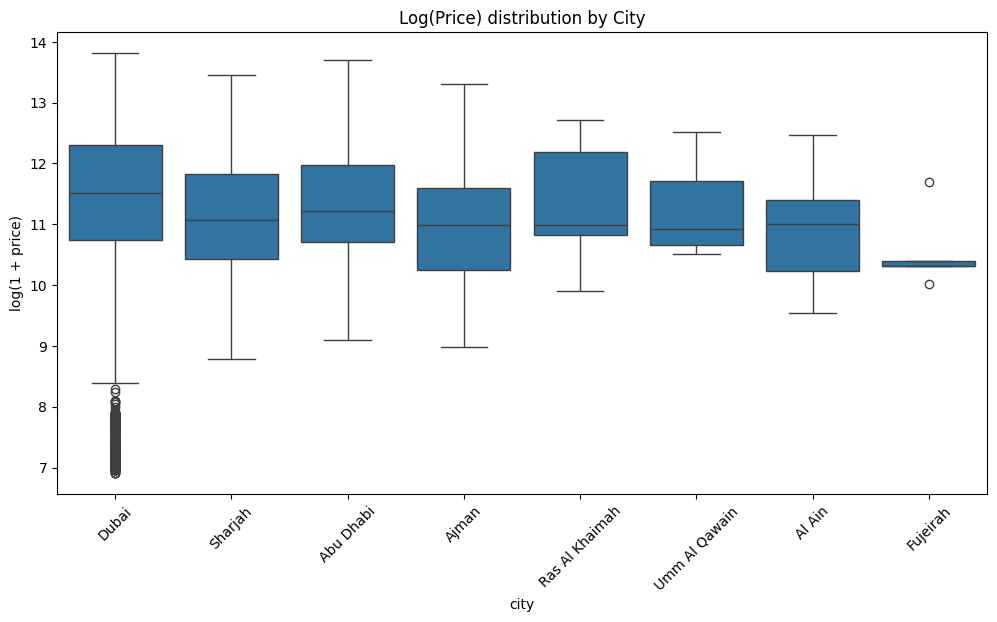

In [93]:
# City

plt.figure(figsize=(12,6))
sns.boxplot(x='city', y=np.log1p(train_df['price']), data=train_df)
plt.xticks(rotation=45)
plt.title('Log(Price) distribution by City')
plt.ylabel('log(1 + price)')
plt.show()

### Numerical vs Price

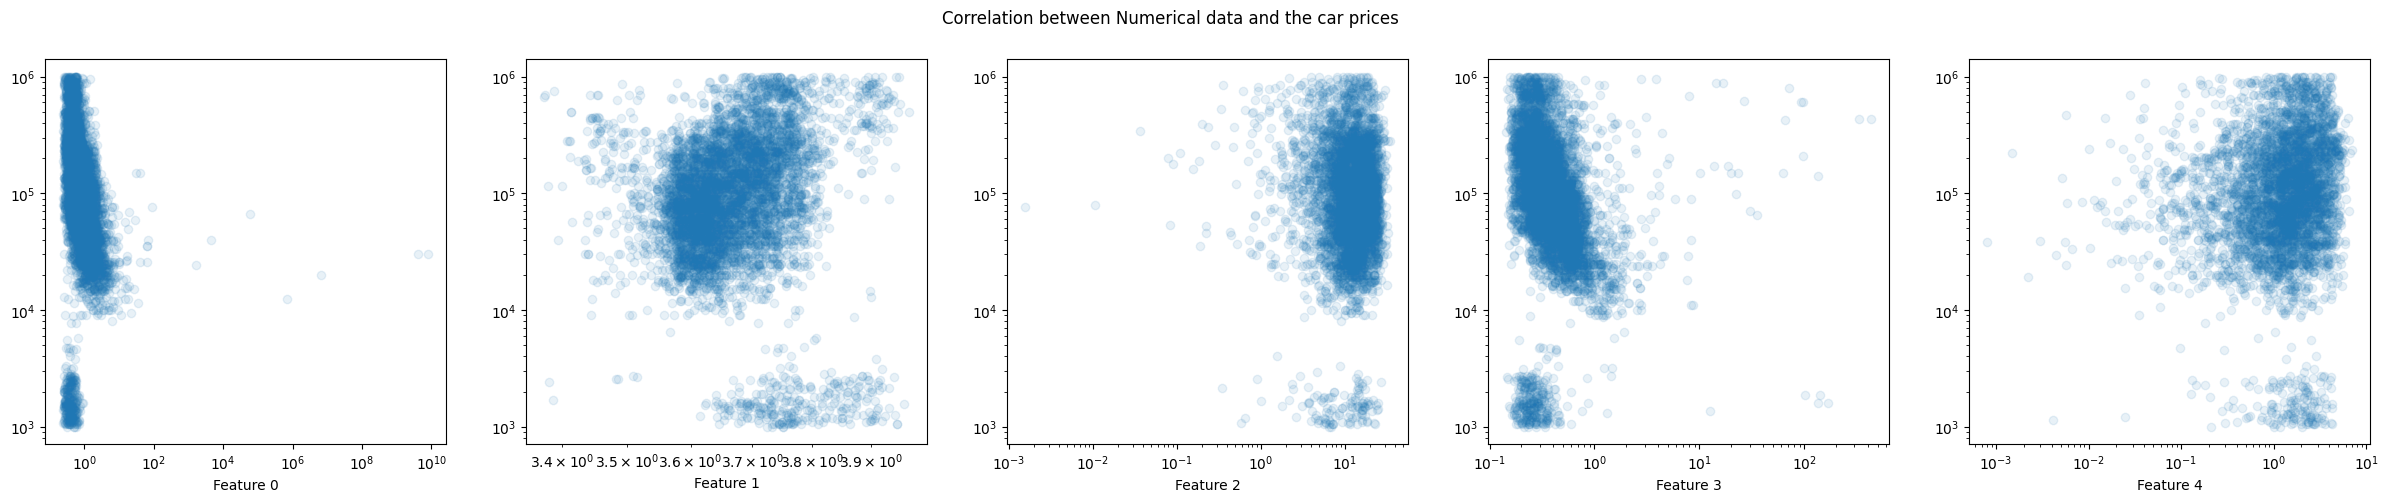

In [81]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
# plt.subplots_adjust(wspace=.5, hspace=.5)

# plot the cumulative distributions for each column

for i in range(5):

    ax[i].scatter(x=X_train[f'{i}'], y=y_train, alpha=0.1)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

🌟 Interesting!!!! When we log the numerical features and plot them against price, we notice clear clustering!!

### Detecting outliers in Numerical Columns with Isolation Forest

In [87]:
num_train = X_train.select_dtypes(include=np.number)

KeyError: 'price'

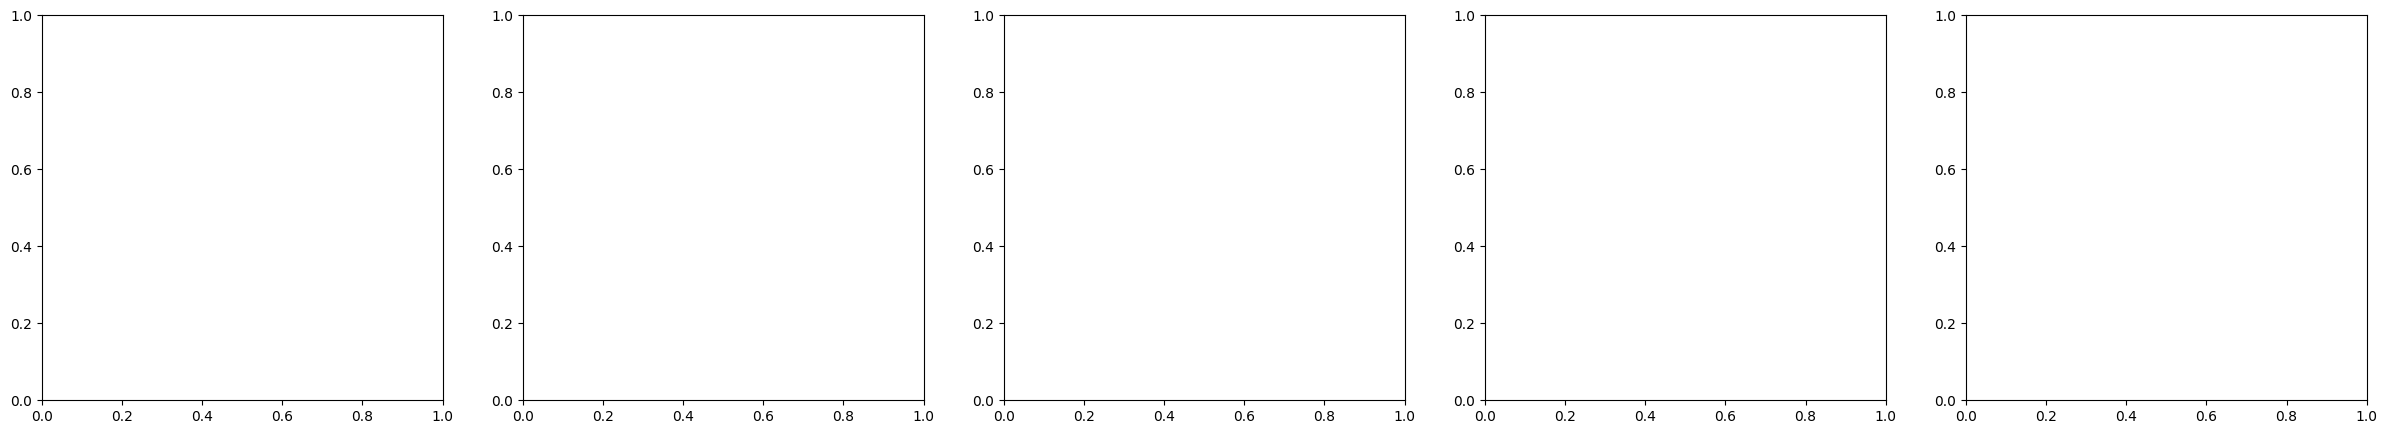

In [86]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer # for the isolation forest

# temporarry impute missing values in numerical features before applying Isolation Forest
imputer = SimpleImputer(strategy='median')  # median is robust to outliers
num_temp = imputer.fit_transform(num_train)

iforest = IsolationForest(#contamination = 0.03, 
                          random_state=42)

# testing iforest on the whole train set to see the distribution of outliers
iforest.fit(num_temp)
num_train['outliers'] = iforest.predict(num_temp) == -1

fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):

    ax[i].scatter(x=num_train[f'{i}'], y=num_train['price'], alpha=0.1, c=num_train['outliers'], cmap='coolwarm')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

## Insights from EDA

## Train Data Visualizations

# Data Pre-Processing

# Feature Engineering

In [80]:
# correlation coefficient between numerical and target variable
corr = X_train.select_dtypes(include=np.number).corrwith(y_train)
print("Correlation coefficients between numerical features and target variable:")
print(corr)

Correlation coefficients between numerical features and target variable:
0   -0.012433
1    0.277723
2   -0.201316
3    0.019822
4    0.050619
dtype: float64
